# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:
1. Prolem definition
2. Data
3. Evaluation
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Statement 

In a statement, 
> Given clinical parameters about a patient, cna we predict whether or not they have heart disease?

## 2. Data

> Where is the data source? (Cleaveland data from UCI MLR, Kaggle)

## 3. Evaluation
> Proof of concept should meet 95% and it will be pursued

## 4. Features

### Create data dictionary 

id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

## Preparing the toools

Were going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [213]:
# Import alll the tools we need

# Regular EDA (explaoratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve #deprecated, instead use
from sklearn.metrics import RocCurveDisplay

## Load Data

In [214]:
df = pd.read_csv("heart-disease.csv")
df.shape 

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find more about the data and become a subject matter expert on the dataset you might be working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types? (i.e. numerical, categorical)
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data.

In [215]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [216]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [217]:
# Find how many of each class there are (i.e. has heart disease or not)
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

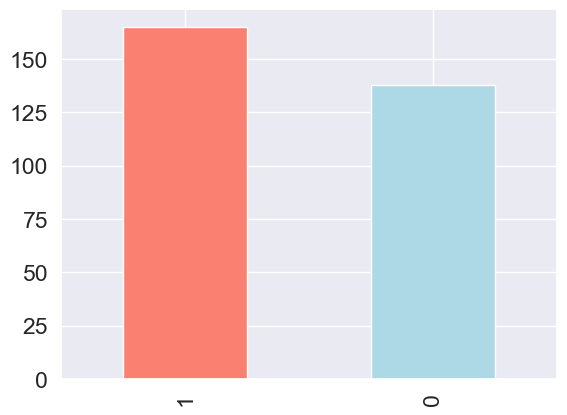

In [218]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [220]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [221]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [222]:
# Compare columns

## Heart Disease Frequency according to Sex

In [223]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [224]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


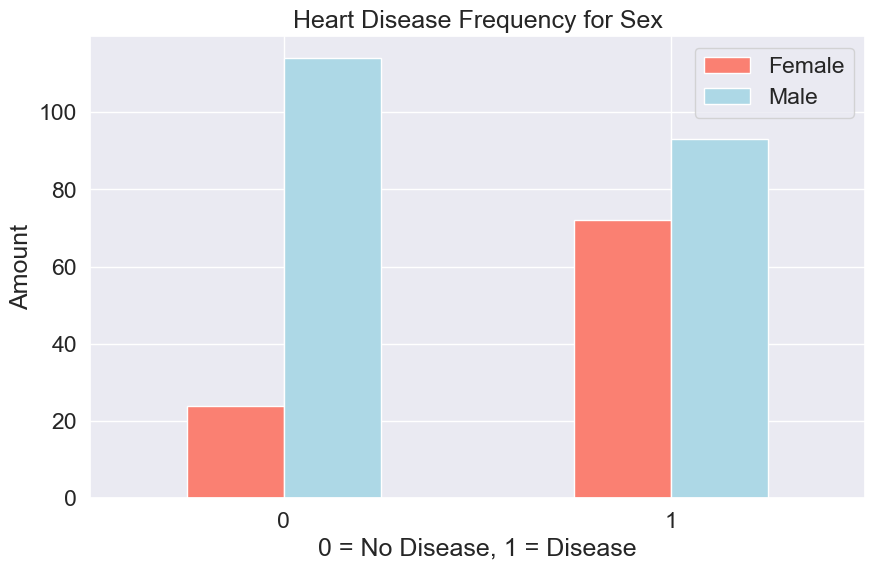

In [225]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [226]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [227]:
df["thalach"].value_counts() # hmmm. too much value_counts length (different values) scatterplot will be better than a bar plot

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

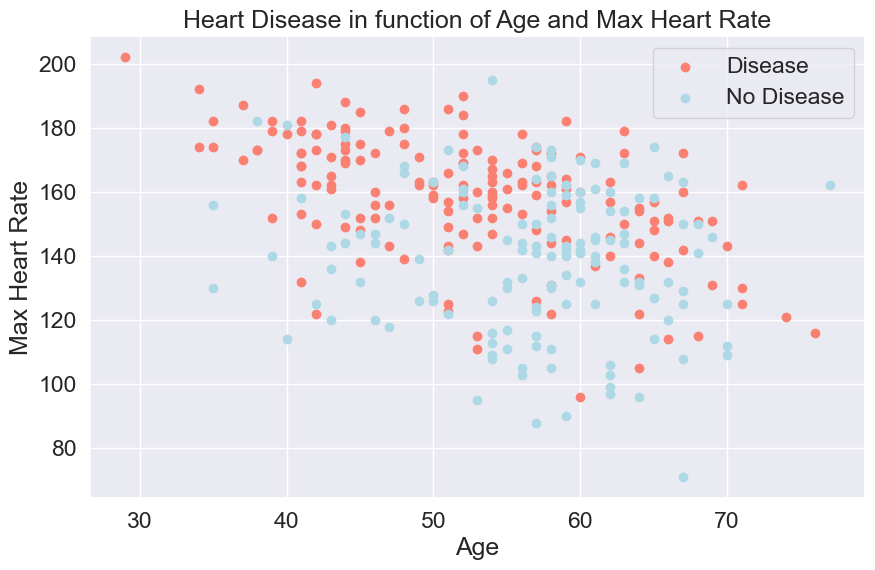

In [228]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples (Max heart rate/age with heart disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples (Max heart rate/age without heart disease)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

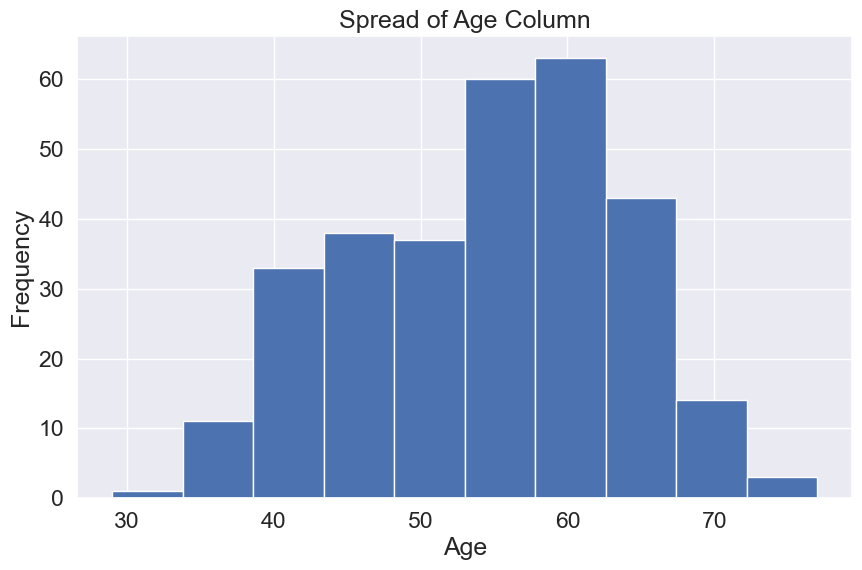

In [229]:
# Check the distribution of the age column with a histogram

df.age.plot.hist(figsize=(10, 6))
# plt.figure(figsize=(10, 6))
# plt.hist(df.age)

# Add information to the plot
plt.title("Spread of Age Column")
plt.xlabel("Age")
plt.ylabel("Frequency");

## Heart Disease Frequency per Chest Pain Type

cp - chest pain type 
* 0. typical angina: chest pain related decrease blood supply to the heart
* 1. atypical angina: chest pain not related to heart
* 2. non-anginal pain: typically eosphageal spasms (not heart related)
* 3. asymptomatic: chest pain not showing signs of disease

In [230]:
pd.crosstab(df["target"], df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [231]:
# Value counts of cp-0 (typical angina)
df[df["cp"]==0].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
35   0    0   138       183   0    1        182      0      1.4      2      0   2     1         1
60   1    0   140       293   0    0        170      0      1.2      1      2   3     0         1
59   1    0   170       326   0    0        140      1      3.4      0      0   3     0         1
60   0    0   150       258   0    0        157      0      2.6      1      2   3     0         1
     1    0   117       230   1    1        160      1      1.4      2      2   3     0         1
                                                                                               ..
53   1    0   142       226   0    0        111      1      0.0      2      0   3     1         1
54   1    0   110       206   0    0        108      1      0.0      1      1   2     0         1
                        239   0    1        126      1      2.8      1      1   3     0         1
              120       1

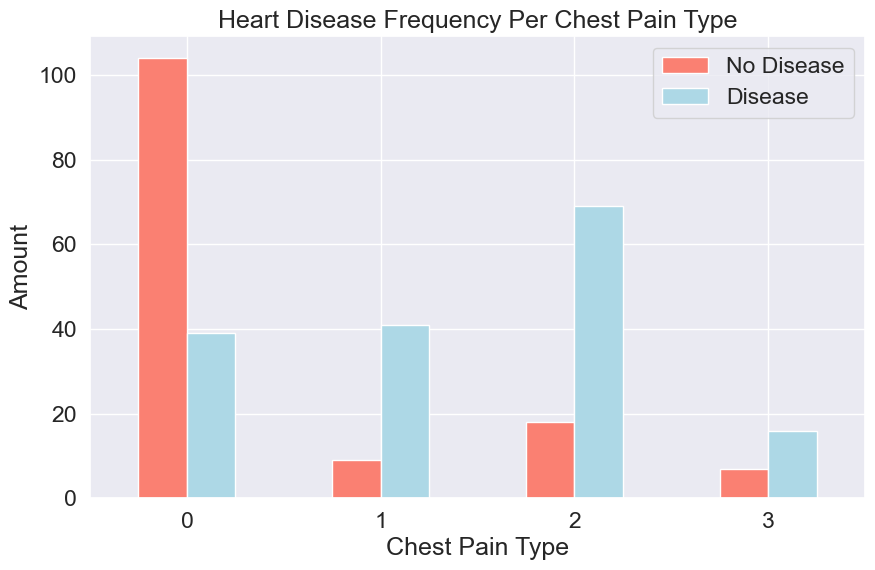

In [232]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [233]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [234]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


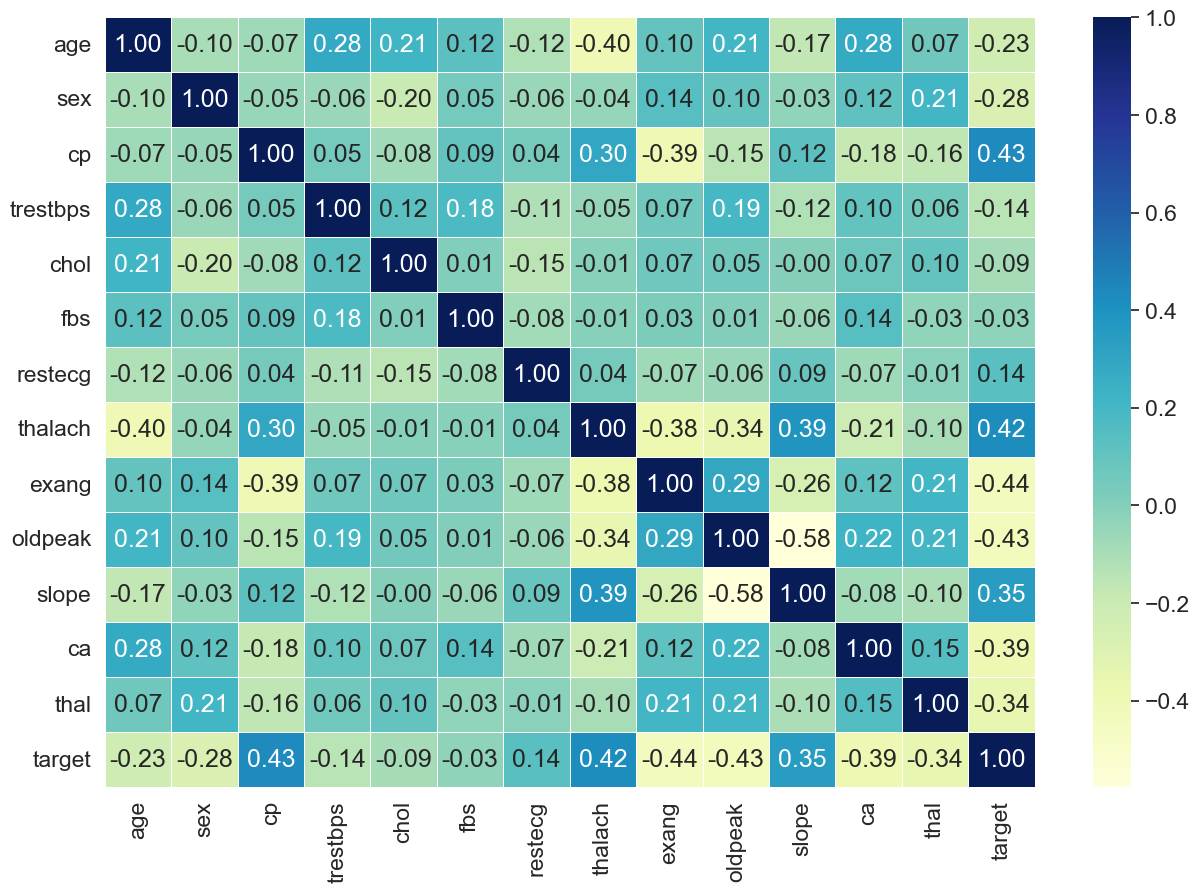

In [235]:
# Make the correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [236]:
# Negative Correlation - a relationship between two variables in which
# one variable increases while another decreases

# Exang and Target have a negative correlation of -0.44
# i.e. if exang=1, target is favored towards 0 (negative correlation)
pd.crosstab(df["target"], df["exang"])

exang,0,1
target,,
0,62,76
1,142,23


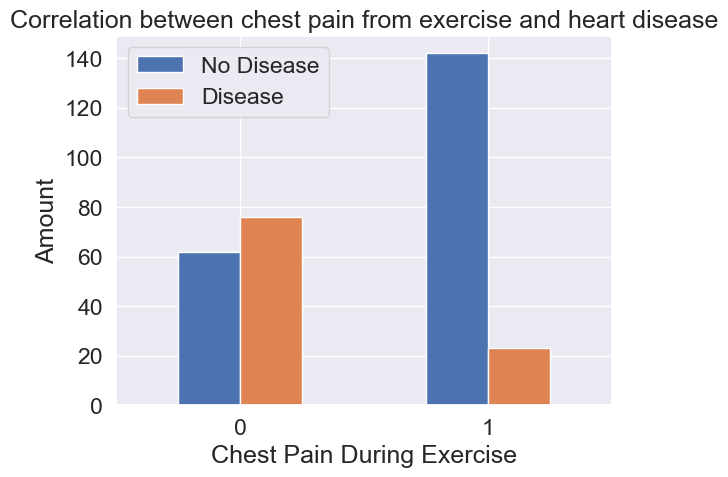

In [237]:
# Make the crosstab visually prettier
pd.crosstab(df["target"], df["exang"]).plot.bar()

# Add some communication
plt.title("Correlation between chest pain from exercise and heart disease")
plt.xlabel("Chest Pain During Exercise")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Model Driven EDA with predictive power or..

## 5.0 Modeling

In [238]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [239]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [240]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [241]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [242]:
# Split the data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [243]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [244]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model. 

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [245]:
# import estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics (did myself)
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score, f1_score

In [246]:
# Approached it first, variable names might not match video
# Put models in a Dictionary 
estimators = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: Dictionary of different Skleran ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through our models
    for model_name, clf in models.items():
        # Fit the model to the data
        clf.fit(X_train, y_train)
        
    # Evaluate the model and append it's scores to model_scores
        model_scores[model_name] = clf.score(X_test, y_test)

    return model_scores

In [247]:
model_scores = fit_and_score(models=estimators, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

C:\Users\Home\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

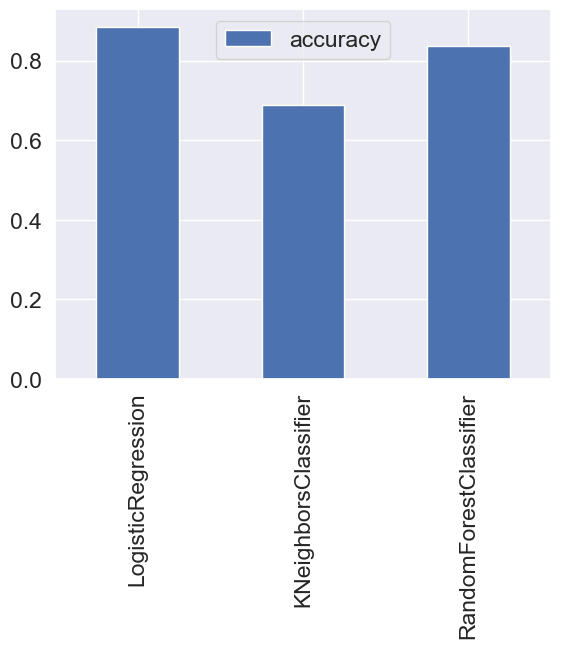

In [248]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got our baseline model.. and we know a model's fiirst prediction aren't always whatwe should base our next seeps off. 
What should we do?

Let's look at the following.
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)


### Hyperparmeter tuning (by hand)

In [249]:
# Let's manually tune KNN (even though the previous code shows LR has the best
# scores) to try to improve it's baseline score of 0.6885245901639344

train_scores = []
test_scores = []

# A simple google search like 'how to tune a K Nearest Neigbors classifier' 
#is a great way to find out how to do this

# Create a list of different values for n_neighbors
neighbors = range(1, 21)


# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [250]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [251]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [252]:
# ignore - a solution I'm waiting for him to implement in the video
# can delete if not gotten back to.
# def evaluate_preds():
#     eval_metrics = {}

#     return eval_metrics

Maximum KNN score on the test data: 75.41%


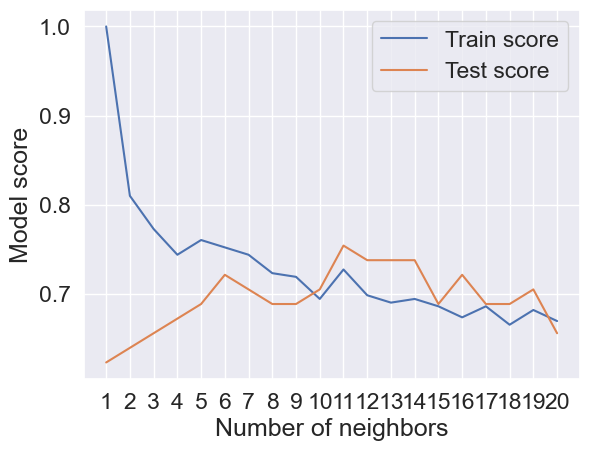

In [253]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

Even with the hyperparameter tuning,
The improved KNN with the score of 75.41%, it still 
hasn't reached the scores of LR and RF scores. So, this model will be
discarded for the project.

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune
* LogisticRegression()
* RandomForestClassifier()

... using RandomisedSearchCV

Remember if you want to know what hyperparmeters to tune, it's a google search away. Read the docs, and you might not understand the documentation at first, but you can do your research on different posts and have a deeper understanding and practicalization.

> These are steps that ML engineers and Data Scientists take everyday to figure out how to improve their models. No one in the beginning knows how to do this off by heart. Even after doing it many times, you most likely will still need to look these things up.

In [254]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), # arange rather than range for continuous distributions as advised in the docs
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our modells, let's tune them using RandomizedSearchCV

In [255]:
# Tune LogisticRegression

np.random.seed(42) #so that our results are reproducable

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, #try 20 different combinations
                                verbose=True)

# Fit random hyperameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [256]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [257]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Hmm, RandomSearch_LR has same results as initial model, you could research more hyperparameters to finetune,  but we're leaving it as so for the time being 

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [258]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparemeter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [259]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [260]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [261]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

Our initial LogisticRegression model still has the best scores. Of course we can still try to tune other hyperparemeters of RFClf, in order to get good results, but to save time, we'll go ahead with
the best estimator we have here, LogisticRegression.

## Hyperparameter Tuning with GridSearchCV,

Since our LogisticRegression model proves to be the best so far, we'll try to further improve it  using GridSearchCV

In [262]:
# Different hyperparameters for our LogisticRegssion model
# GridSearchCV tries every single parameter in our grid
# while searching for the best hyperparameters

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [263]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [264]:
# Evaluate the grid search LogisticRegresssion model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [265]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Presicion
* Recall
* F1-score 

... and it would be gerat if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [266]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [267]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [268]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

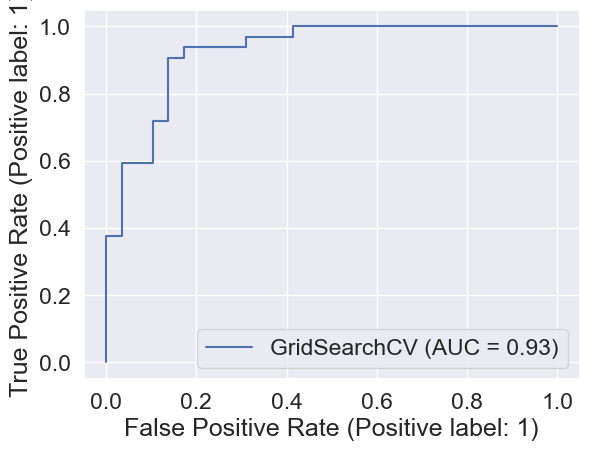

In [269]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,
                               X=X_test,
                               y=y_test)

In [270]:
 # Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


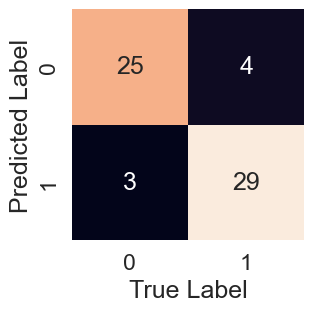

In [271]:
# Improve visulization of confusion matrix using seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

Now we've got an ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [272]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**About each metric**

* **Precision** indicates the proportion of positive identifications which were actually correct. A model which predicts no false positives, has a precision of 1.0

* **Recall** indicates the proportion of actual positives which were correctly classified. A model which predicts no false negaiives has a recall score of 1.0.

* **f1** is a combination of precision and recall. i.e. if precision and recall are each 1.0, then f1 = 1.0

* **support** is the number of samples each metric was calculated on. i.e. in the above data, there are 20 samples with target 0 and 32 samples with target 1.

* **macro-avg** is the average precision, recall and f1-score betweeen classes (targets in our case) . It doesn't take class imbalance into account.(our case doesn't have class imbalance)

* **weighted-avg** is the **weighted** average precision recall and f1-score betweeen classes. (**weighted** implies each metric is calculate with how many samples there are in each class)

The above classification report only gives us the classification report from just one test split. (one X_test split). Now let's do a cross validated split classification report

### Calculate evlauation metrics using cross-validtion

We're going to calculate accuracy, precision, recall and f1-score of our model
using cross-validation using scikit_learn's `cross_val_score()`

In [273]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [274]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [275]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [276]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [277]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [278]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [279]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

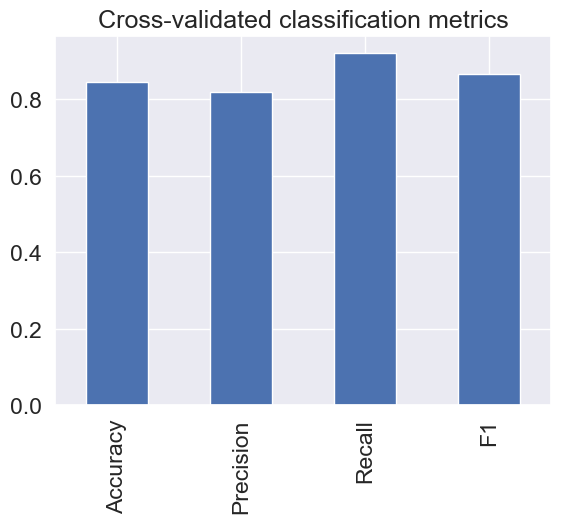

In [280]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=["scores"]);

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [281]:
cv_metrics

,Accuracy,Precision,Recall,F1
scores,0.844699,0.820794,0.921212,0.867301


### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

You can google something like **how to find feature importance using `estimator_name`** (in our case, LogisticRegression.)

In [282]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [283]:
# Fit an instance of LogisticRegression with best params i.e. gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [284]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [285]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [286]:
# Match coef's of features to columns (resulting like our correlation matrix from eariler)
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

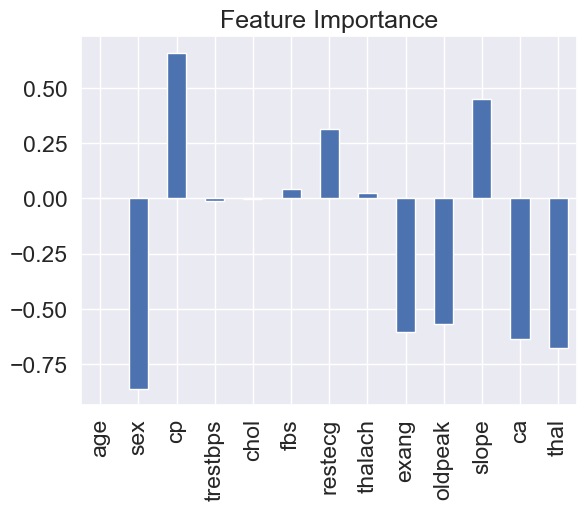

In [287]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=["importance"])

feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [288]:
# Sex has a negative coeffecient with target
# When the value for sex increases, the ratio between the targets decreases
# So the for this data, heart disease ratio for 0-men (72/24 -> 3) is higher than
# The heart disease ratio for 1-women (144/93 -> 1.5)

pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [289]:
# slope has a positive coefficient with target
# As the values of slope increases,
# so does the number of samples of the targets increase as well (not ratio like negative coefficient)
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [290]:
# what even is positive and negative correlation?
# difference between correlation and coefficient?
# How does it translate to our data?

# 6. Experimentation

A lot we've done so far has been experimentation. Fulfilling our framework.

If you haven't hit your evaluation metric yet.. ask yourself..

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost (extracurricular- haven't covered it yet)
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

Don't be afraid to be wrong in ML. Ask questions, reach out to people, ask a community, check for examples

in this case I can't collect more data.
Let me search about catBoost and XGboost -> I see that they are software for effecient and scalable model training, I don't want to install anything just yet so I'll skip that.
Then I'll resort to tuning more of the hyperparmeters. Would that increase our accuracy